# **Flight Prediction Analysis**
## **Part 2 : Creating Machine Learning Models**


Dengan menggunakan dataset Flight Prediction Analysis, akan dibuat sebuah model machine learning untuk mencari pola dalam penentuan harga tiket pesawat berdasarkan fitur-fitur yang ada dalam tiap kolom.
Pembuatan model akan dimulai dengan impor pustaka

### 1.Impor Pustaka

In [2]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

### 2.Akses Data

In [3]:
dataset = pd.read_csv('D:\Google Bangkit Batch 1 2024\My Project\Flight Price Prediction\Data Source\Clean_Dataset.csv')
dataset.head(10)

<>:1: SyntaxWarning: invalid escape sequence '\G'
<>:1: SyntaxWarning: invalid escape sequence '\G'
C:\Users\INTEL\AppData\Local\Temp\ipykernel_16260\714362077.py:1: SyntaxWarning: invalid escape sequence '\G'
  dataset = pd.read_csv('D:\Google Bangkit Batch 1 2024\My Project\Flight Price Prediction\Data Source\Clean_Dataset.csv')


,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
5,5,Vistara,UK-945,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.33,1,5955
6,6,Vistara,UK-927,Delhi,Morning,zero,Morning,Mumbai,Economy,2.08,1,6060
7,7,Vistara,UK-951,Delhi,Afternoon,zero,Evening,Mumbai,Economy,2.17,1,6060
8,8,GO_FIRST,G8-334,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.17,1,5954
9,9,GO_FIRST,G8-336,Delhi,Afternoon,zero,Evening,Mumbai,Economy,2.25,1,5954


Kita coba gunakan screening awal terhadap data di tiap kolom. Ini penting untuk menentukan metode preprocessing apa yang harus digunakan untuk mengubah data agar bisa diterima oleh model. 
Format yang akan kita gunakan adalah "kolom - tipe data"

1. **airline** - **kategorikal**,
2. **source city** - **kategorikal**,
3. **departure time** - **kategorikal**,
4. **stops** - **kategorikal**,
5. **arrival time** - **kategorikal**,
6. **destination city** - **kategorikal**,
7. **class** - **kategorikal**,
8. **duration** - **numerik(floating point)**,
9. **days left** - **numerik(diskrit)**,
10. **price** - **numerik(floating point)**

In [4]:
dataset = dataset.drop(columns = ['Unnamed: 0'])
dataset

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


### 3.Pembuatan Model Machine Learning

Dalam pembuatan model ini, karena banyaknya variabel yang bersifat kategorikal dibandingkan numerikal, ada beberapa metode yang bisa diaplikasikan. Yaitu algoritma **Random Forest Regression**  Algoritma kedua yang mungkin bisa digunakan adalah **Extreme Gradient Boost (XGB Regression)**. Dalam proses regresi, variabel variabel kategorikal akan kita golongkan sebagai **fitur(features)** sedangkan variabel numerik seperti harga/price digolongkan ke dalam **target**. Fitur yang ada akan dicocokkan dengan menggunakan sistem encoding 1-0 dan disesuaikan (fitting) dengan target. 

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,RobustScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

### 3.1.Penyiapan Data

Kita akan mulai dengan membagi antara fitur kateogorikal dan data target (numerik). Setelah kedua data dipisah, kita bagi antara data latih dan data untuk pengujian keakuratan model

In [7]:
categorical_features = ['airline','source_city','departure_time','arrival_time','stops','destination_city',
                        'class']
numerical_features = ['duration','days_left']
target = 'price'

x = dataset[categorical_features + numerical_features]
y = dataset[target]


Disini, tiap data kategorikal akan ditransformasi menjadi kolom yang berisi nilai 1 dan 0. Untuk itu kita menggunakan modul OneHotEncoder dari Scikit-Learn Sedangkan untuk fitur-fitur numerik akan ditransformasi dengan menggunakan standard scaler

In [8]:
#Pembagian antara data latih dan data uji
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

#transformasi data kategorikal 
categorical_transformer = OneHotEncoder(handle_unknown='ignore')
numerical_transformer = RobustScaler()

#persiapan awal data untuk dimasukkan ke dalam regressor
#fitur kategorikal dijalankan dengan mengaktifkan categorical transformer yaitu One Hot Encoder
#fitur numerik dapat langsung dimasukkan ke dalam model tanpa proses transformasi data apapun

preprocessor = ColumnTransformer(
    transformers=[
        ('cat',categorical_transformer,categorical_features),
        ('num',numerical_transformer,numerical_features)])



### 3.1.Model Random Forest

<center>
    <img src="RF_Regression.png" alt="Model Random Forest" width="400"/>
    <figcaption>Gambar 1.Model Random Forest </figcaption>
</center>


Model pertama yang akan kita gunakan adalah Random Forest. Akan dibuat sebuah pipeline yang mengatur agar data yang telah diproses langsung di-fitting dengan menggunakan Random Forest Regressor. Random Forest adalah algoritma(prosedur perhitungan) yang merupakan gabungan dari Decision Tree (pohon keputusan). Random Forest juga tergolong ke dalam metode pembelajaran mesin ansambel/ensemble, karena algoritma ini terbentuk dari banyak algoritma yang digabungkan menjadi satu. Decision Tree dibuat secara acak dan di tiap node dilakukan penghitungan output. Hasil penghitungan output dari masing-masing decision tree ini digabungkan dengan decision tree yang lain untuk mendapatkan hasil akhir. 


Keuntungan dalam menggunakan model Random Forest adalah kemampuannya untuk menemukan pola-pola non-linier dari sebuah data, mampu bekerja dengan dataset yang sangat besar, serta memmiliki tingkat keakuratan yang tinggi jika dibandingkan dengan Decision Tree. Sementara kekurangannya adalah model ini lebih sulit ditafsirkan. Waktu yang dibutuhkan untuk melatih model ini juga lebih lama dibandingkan dengan melatih decision tree.

Berikut ini kita inisiasi model Random Forest dan kita masukkan data yang telah dibagi menjadi data latih dan data uji.

In [9]:
#Model Random Forest dengan jumlah estimator sebanyak 120
model_rf = Pipeline(
    steps = [('preprocessor',preprocessor),
             ('regressor',RandomForestRegressor(n_estimators = 400,
                                                random_state = 42,
                                                verbose = 2))])
 
#fitting model
model_rf.fit(x_train,y_train)

building tree 1 of 400
building tree 2 of 400
building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400
building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400
building tree 38 of 400
building tree 39 of 400
building tree 40 of 400


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed: 22.9min


building tree 41 of 400
building tree 42 of 400
building tree 43 of 400
building tree 44 of 400
building tree 45 of 400
building tree 46 of 400
building tree 47 of 400
building tree 48 of 400
building tree 49 of 400
building tree 50 of 400
building tree 51 of 400
building tree 52 of 400
building tree 53 of 400
building tree 54 of 400
building tree 55 of 400
building tree 56 of 400
building tree 57 of 400
building tree 58 of 400
building tree 59 of 400
building tree 60 of 400
building tree 61 of 400
building tree 62 of 400
building tree 63 of 400
building tree 64 of 400
building tree 65 of 400
building tree 66 of 400
building tree 67 of 400
building tree 68 of 400
building tree 69 of 400
building tree 70 of 400
building tree 71 of 400
building tree 72 of 400
building tree 73 of 400
building tree 74 of 400
building tree 75 of 400
building tree 76 of 400
building tree 77 of 400
building tree 78 of 400
building tree 79 of 400
building tree 80 of 400
building tree 81 of 400
building tree 82

[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed: 85.7min


building tree 162 of 400
building tree 163 of 400
building tree 164 of 400
building tree 165 of 400
building tree 166 of 400
building tree 167 of 400
building tree 168 of 400
building tree 169 of 400
building tree 170 of 400
building tree 171 of 400
building tree 172 of 400
building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400
building tree 177 of 400
building tree 178 of 400
building tree 179 of 400
building tree 180 of 400
building tree 181 of 400
building tree 182 of 400
building tree 183 of 400
building tree 184 of 400
building tree 185 of 400
building tree 186 of 400
building tree 187 of 400
building tree 188 of 400
building tree 189 of 400
building tree 190 of 400
building tree 191 of 400
building tree 192 of 400
building tree 193 of 400
building tree 194 of 400
building tree 195 of 400
building tree 196 of 400
building tree 197 of 400
building tree 198 of 400
building tree 199 of 400
building tree 200 of 400
building tree 201 of 400


[Parallel(n_jobs=1)]: Done 364 tasks      | elapsed: 189.7min


building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400
building tree 378 of 400
building tree 379 of 400
building tree 380 of 400
building tree 381 of 400
building tree 382 of 400
building tree 383 of 400
building tree 384 of 400
building tree 385 of 400
building tree 386 of 400
building tree 387 of 400
building tree 388 of 400
building tree 389 of 400
building tree 390 of 400
building tree 391 of 400
building tree 392 of 400
building tree 393 of 400
building tree 394 of 400
building tree 395 of 400
building tree 396 of 400
building tree 397 of 400
building tree 398 of 400
building tree 399 of 400
building tree 400 of 400


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['airline', 'source_city',
                                                   'departure_time',
                                                   'arrival_time', 'stops',
                                                   'destination_city',
                                                   'class']),
                                                 ('num', RobustScaler(),
                                                  ['duration', 'days_left'])])),
                ('regressor',
                 RandomForestRegressor(n_estimators=400, random_state=42,
                                       verbose=2))])

Untuk mempermudah evaluasi model, kita akan buat sebuah fungsi yang mengambil nilai hasil prediksi dari model dan menghitung MAPE,MAE dan juga MSE dari data tersebut. 

In [10]:
def predict_n_eval(x_test,y_test,model):
    y_pred = model.predict(x_test)

    #counting MSE
    MSE = mean_squared_error(y_test,y_pred)

    #counting MAE
    MAE = mean_absolute_error(y_test,y_pred)

    #counting MAPE (Mean Absolute Percentage Error)
    MAPE = np.mean(np.abs((y_test-y_pred)/y_test)) * 100

    #Counting R2 SCORE
    r2 = r2_score(y_test, y_pred)

    return y_pred,MSE,MAE,MAPE,r2

In [11]:
y_pred,mse_rf,mae_rf,mape_rf,r2_rf = predict_n_eval(x_test,y_test,model_rf)
print(f'Nilai rata-rata error kuadrat sebesar {mse_rf}')
print(f'Nilai rata-rata error absolute sebesar {mae_rf}')
print(f'Nilai rata-rata persentase error sebesar {mape_rf}')
print(f'Nilai R2 adalah {r2_rf}')

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    1.7s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    7.0s
[Parallel(n_jobs=1)]: Done 364 tasks      | elapsed:   14.4s


Nilai rata-rata error kuadrat sebesar 7448291.087639954
Nilai rata-rata error absolute sebesar 1061.2914364666385
Nilai rata-rata persentase error sebesar 6.9113641634453975
Nilai R2 adalah 0.985393462368942


Jika dilihat dari nilai Mean Absolute Error, nilai hasil prediksi sangat jauh bedanya dengan nilai aktual. Hal ini menunjukkan bahwa dengan jumlah pohon keputusan (n estimator) sebanyak 400 masih belum cukup untuk membuat prediksi yang tepat. Berikut akan kita lihat perbedaan antara data hasil prediksi dengan data aktual. Meskipun begitu, apabila dilihat dari R2 score yang didapatkan, diketahui bahwa semua variabel independen (fitur kategorikal dan fitur numerik) mampu menjelaskan varians dari data target (harga tiket/price)

In [12]:
comparison = pd.DataFrame({
    'actual value': y_test,
    'predicted value': y_pred
})

comparison.head(10)

,actual value,predicted value
44515,12269,14238.752500
201170,4363,5029.385000
181634,7352,7367.565000
264431,50271,50389.805000
132561,5790,5842.485000
271658,52175,56020.660000
210470,42312,42312.000000
6848,2409,2571.692500
274149,55983,56263.519286
211327,29776,30104.242500


Pada beberapa data diatas, terlihat bahwa hasil prediksi selalu meleset, baik itu melebihi nilai aktual maupun dibawah nilai aktual. Dari sini kita dapat menyimpulkan bahwa model random forest tidak bisa bekerja dengan begitu efisien. Dibutuhkan estimator yang lebih banyak dan jumlah node dan leaf yang terdefinisi dengan jelas agar hasil prediksi bisa sesuai dengan nilai aktual. 

### 3.1.Model XGBoost

Untuk membandingkan tingkat keakuratan model, disini kita akan gunakan XGBoost untuk predictive modelnya.

In [13]:
import xgboost as xgb

Berikut adalah proses pelatihan data dengan menggunakan XGBRegressor. Kita akan tetap menggunakan Mean Squared Error, karena nilai Squared Error yang besar memberikan nilai penalti yang juga besar pada model agar bisa menyesuaikan nilai-nilai dari tiap fitur dengan lebih tepat, sehingga model menjadi lebih akurat dalam hal prediksi. Nilai verbosity diatur menjadi 3, agar kita bisa dengan mudah melihat proses apa saja yang terjadi di dalamnya dan bisa dengan mudah melakukan debugging pada model jika ada sesuatu yang salah. 

In [14]:
#fitting model
model_xgboost =Pipeline(
    steps = [
        ('preprocessor', preprocessor),
        ('regressor',xgb.XGBRegressor(objective='reg:squarederror',
                                      learning_rate = 0.1,
                                      n_estimators = 400,
                                      random_state = 42,
                                      reg_lambda = 2,
                                      verbosity=2))
    ]
)

#pelatihan data
model_xgboost.fit(x_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['airline', 'source_city',
                                                   'departure_time',
                                                   'arrival_time', 'stops',
                                                   'destination_city',
                                                   'class']),
                                                 ('num', RobustScaler(),
                                                  ['duration', 'days_left'])])),
                ('regressor',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, co...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.1,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=400, n_jobs=None,
                              num_parallel_tree=None, random_state=42, ...))])

Model telah selesai dilatih, kemudian kita akan coba melakukan prediksi sekaligus mengevaluasi kinerja model

In [15]:
y_pred_xgb,mse_xgb,mae_xgb,mape_xgb,r2_xgb = predict_n_eval(x_test,y_test,model_xgboost)
print(f'Nilai rata-rata error absolute sebesar {mae_xgb}')
print(f'Nilai rata-rata persentase error absolute sebesar {mape_xgb}')
print(f'Nilai R2 sebesar {r2_xgb}')

Nilai rata-rata error absolute sebesar 1851.6788055449915
Nilai rata-rata persentase error absolute sebesar 13.636575061690653
Nilai R2 sebesar 0.9789872540168866


Ternyata XGBoost tidak lebih akurat dibandingkan dengan random forest, berikut kita akan lihat langsung perbandingan antara hasil prediksi model XGBoost dengan nilai aktual

In [16]:
compare_xgboost_actual = pd.DataFrame(
    {
        'actual_value': y_test,
        'predicted_ val':y_pred_xgb
    }
)
compare_xgboost_actual

,actual_value,predicted_ val
44515,12269,11400.184570
201170,4363,5636.058105
181634,7352,7562.118164
264431,50271,51233.554688
132561,5790,5929.950195
...,...,...
168711,5441,5152.256836
296237,55377,56899.363281
235331,36980,45082.750000
96214,15083,12250.391602


## **Category Booster(CatBooster)**

Kita akan buat model ketiga, yaitu CatBooster untuk memodelkan,mencocokkan data latih dan mencoba membuat prediksi dari data uji. Alasan penggunaan Category Booster adalah karena dataset yang kita miliki memiliki banyak sekali nilai kategorikal dibandingkan dengan nilai numerikal. Hal ini tentu akan mempersulit mengingat model machine learning hanya menerima nilai numerik untuk membuat sebuah prediksi. 

In [17]:
from catboost import CatBoostRegressor


In [27]:
#kita akan menentukan indeks kolom dimana terdapat fitur kategorikal
categorical_features_idx = [x.columns.get_loc(col) for col in categorical_features]

#Inisiasi model
model_catboost = CatBoostRegressor(
    iterations = 1000,
    learning_rate = 0.1,
    depth =6,
    cat_features = categorical_features_idx,
    verbose = 100
)

#pencocokan model dengan data
model_catboost.fit(x_train,y_train)


0:	learn: 20632.8544244	total: 124ms	remaining: 2m 3s
100:	learn: 4507.1333810	total: 14.8s	remaining: 2m 11s
200:	learn: 4184.4926710	total: 32.7s	remaining: 2m 10s
300:	learn: 3994.7061199	total: 49.9s	remaining: 1m 55s
400:	learn: 3880.7094286	total: 1m 6s	remaining: 1m 39s
500:	learn: 3799.4412782	total: 1m 23s	remaining: 1m 23s
600:	learn: 3725.5146316	total: 1m 41s	remaining: 1m 7s
700:	learn: 3663.6739508	total: 1m 57s	remaining: 50.2s
800:	learn: 3607.0016605	total: 2m 14s	remaining: 33.4s
900:	learn: 3555.0051966	total: 2m 31s	remaining: 16.7s
999:	learn: 3508.7128862	total: 2m 49s	remaining: 0us


In [28]:
#prediksi nilai harga tiket pesawat dengan data uji
y_pred_catboost,mse_catboost,mae_catboost,mape_catboost,r2_catboost = predict_n_eval(x_test,y_test,model_catboost)

#cetak nilainya
print(f'Nilai MSE untuk model CatBoost adalah : {mse_catboost}')
print(f'Nilai MAE untuk model CatBoost adlaah : {mae_catboost}')
print(f'Nilai MAPE model Catbbost adalah {mape_catboost}')
print(f'Nilai R2 score untuk model CatBoost adalah {r2_catboost}')

Nilai MSE untuk model CatBoost adalah : 12424790.580675991
Nilai MAE untuk model CatBoost adlaah : 1997.6174562521176
Nilai MAPE model Catbbost adalah 14.57404083378604
Nilai R2 score untuk model CatBoost adalah 0.9756342536778912


Apabila dituliskan dalam bentuk tabel, seperti inilah perbandingan antara nilai aktual dan nilai hasil prediksi model CatBoost

In [29]:
compare_CatBoost = pd.DataFrame(
    {
        'actual_value': y_test,
        'predicted_ val':y_pred_catboost
    }
)
compare_CatBoost

,actual_value,predicted_ val
44515,12269,11878.859507
201170,4363,5837.267894
181634,7352,7000.484818
264431,50271,51050.121198
132561,5790,6068.084062
...,...,...
168711,5441,5055.739659
296237,55377,54922.006759
235331,36980,49142.607719
96214,15083,11565.134766


## **Visualisasi Data Aktual dan Prediksi Model**

Untuk mempermudah pembacaan antara hasil nilai aktual dan hasil prediksi model, kita akan coba membuat grafiknya. Apabila grafiknya membentuk sebuah garis lurus dan berkumpul di suatu titik artinya nilai hasil prediksi dan nilai aktual tidak terlalu berbeda jauh. Kita akan melakukan ini untuk seluruh model yang digunakan. 

### Visualisasi Grafik Model XGBoost

C:\Users\INTEL\AppData\Local\Temp\ipykernel_16260\93874249.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x = y_test , y = y_pred_xgb, data = compare_xgboost_actual,palette = 'pastel')


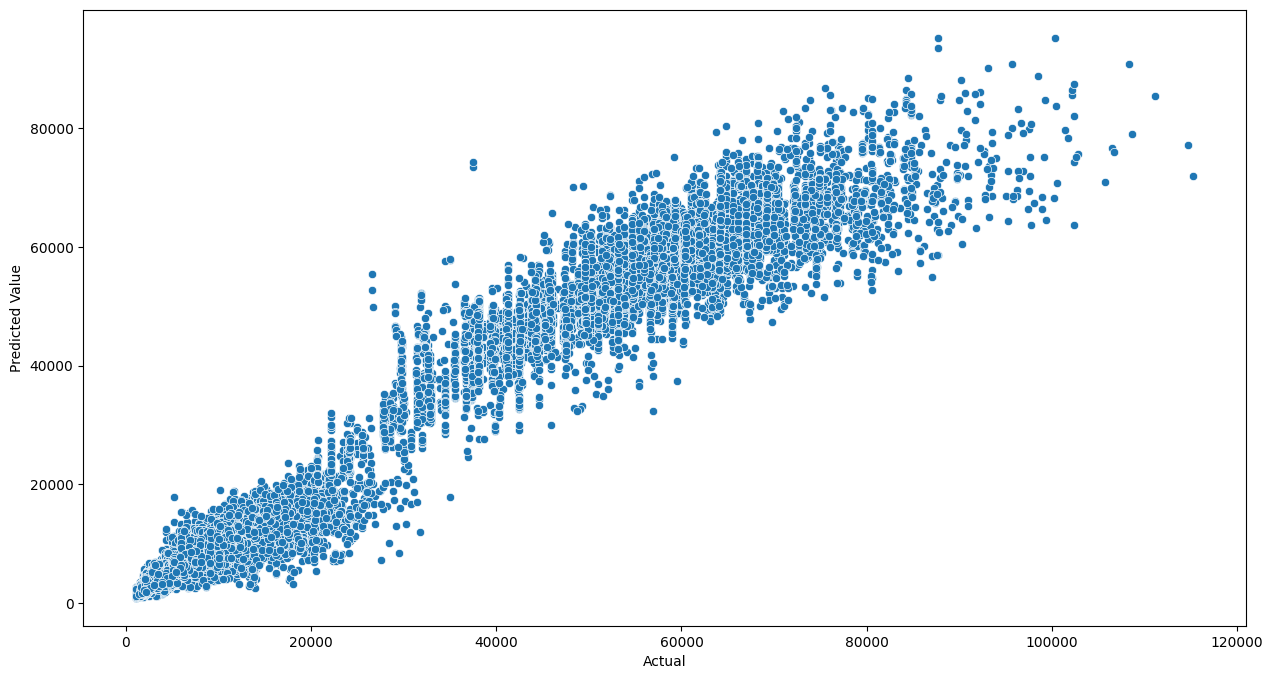

In [30]:
import seaborn as sns
plt.figure(figsize=(15,8))
sns.scatterplot(x = y_test , y = y_pred_xgb, data = compare_xgboost_actual,palette = 'pastel')
plt.xlabel('Actual')
plt.ylabel('Predicted Value')
plt.show()


### Visualisasi Model Random Forest

Text(0, 0.5, 'Predicted value')

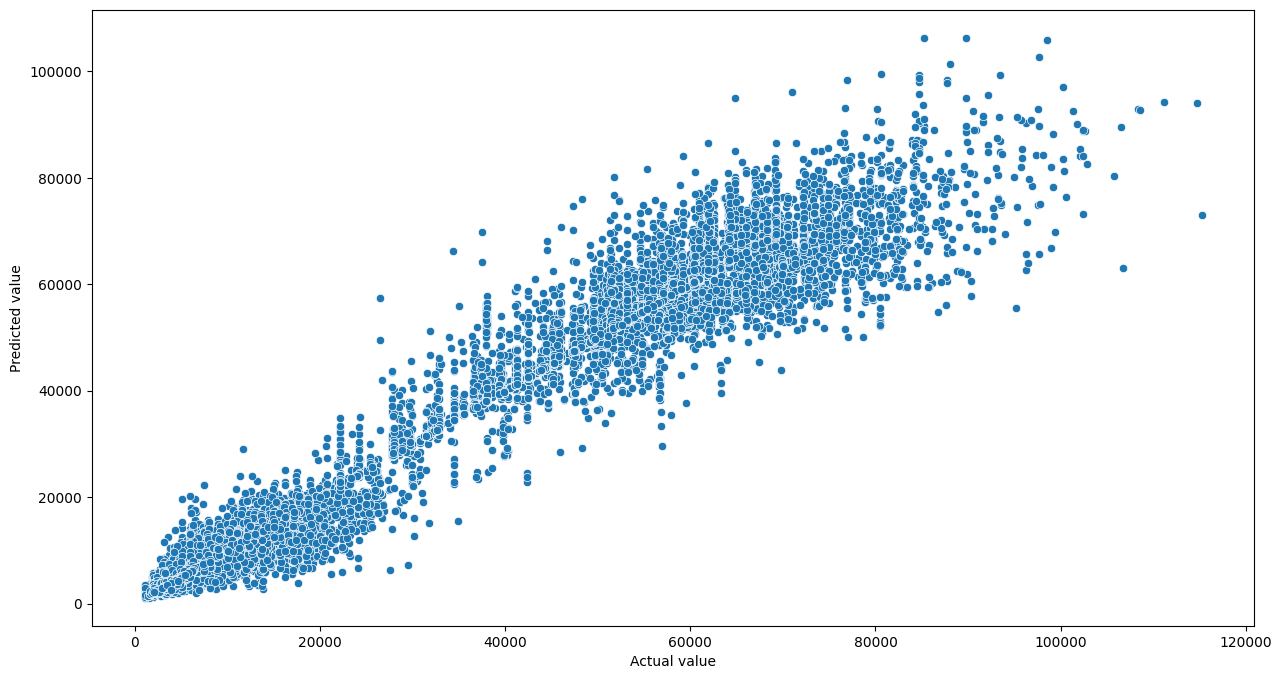

In [31]:
plt.figure(figsize=(15,8))
sns.scatterplot(x = y_test, y = y_pred, data = comparison)
plt.xlabel('Actual value')
plt.ylabel('Predicted value')

### Visualisasi Model CatBoost

Text(0, 0.5, 'Predicted value')

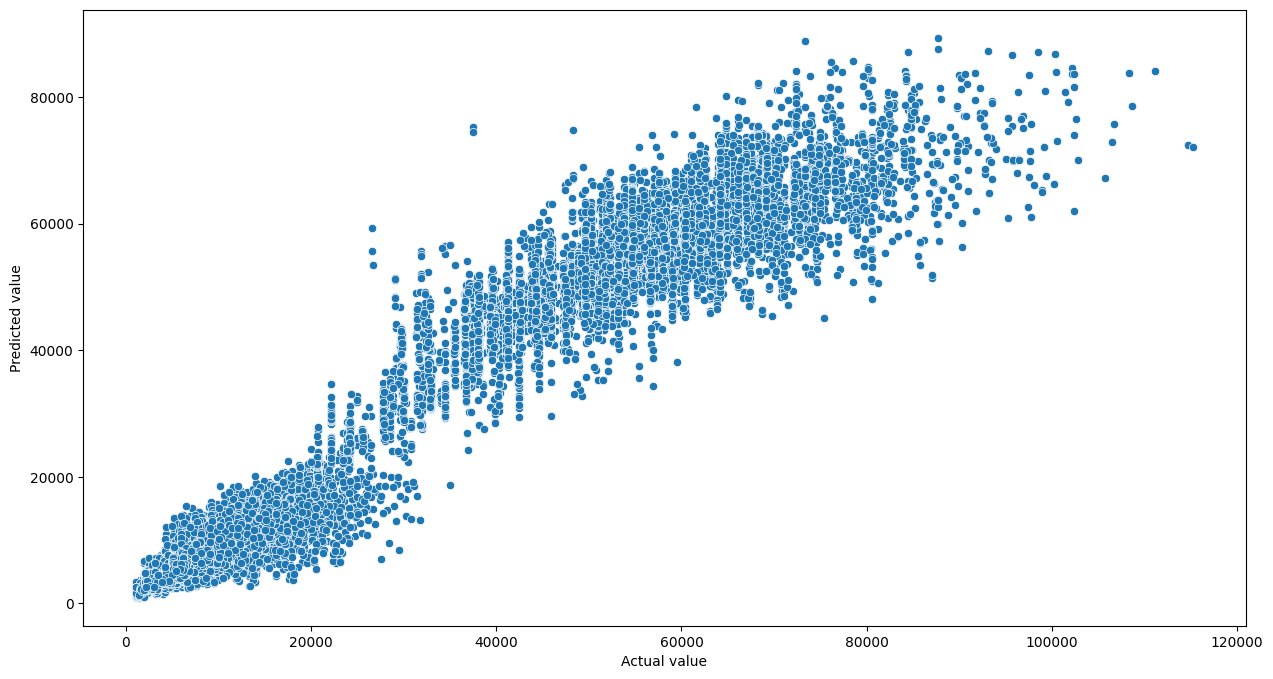

In [32]:
plt.figure(figsize=(15,8))
sns.scatterplot(x = y_test, y = y_pred_catboost, data = compare_CatBoost)
plt.xlabel('Actual value')
plt.ylabel('Predicted value')

Hasil perbandingan antara model Random Forest dengan XGBoost adalah sebagai berikut

In [33]:
compare_model_param = {
    'Mean Squared Error':pd.Series([mse_rf,mse_xgb,mse_catboost],
                                   index = ['Random Forest', 'XGBoost','CatBoost']),
    'Mean Absolute Error':pd.Series([mae_rf,mae_xgb,mae_catboost],
                                    index = ['Random Forest', 'XGBoost','CatBoost']),
    'Mean Absolute Percentage Error(%)': pd.Series([mape_rf,mape_xgb,mape_catboost],
                                                index = ['Random Forest', 'XGBoost','CatBoost']),
    'R2 Score': pd.Series([r2_rf,r2_xgb,r2_catboost],
                          index = ['Random Forest', 'XGBoost','CatBoost'])
}

compare_model_param_df = pd.DataFrame(compare_model_param)

compare_model_param_df

,Mean Squared Error,Mean Absolute Error,Mean Absolute Percentage Error(%),R2 Score
Random Forest,7.448291e+06,1061.291436,6.911364,0.985393
XGBoost,1.071500e+07,1851.678806,13.636575,0.978987
CatBoost,1.242479e+07,1997.617456,14.574041,0.975634


## Kesimpulan

Berdasarkan fitting model diatas, bisa diambil kesimpulan bahwa :
1. Model Random Forest yang digunakan memiliki nilai MAPE (Mean Absolute Percentage Error) sebesar 6.88%. Sedangkan model XGBoost dengan jumlah estimator yang sama, menghasilkan nilai MAPE sebesar 13%. Model CatBoost menghasilkan persentase kesalahan paling besar yaitu 14%. Pada kasus ini terbukti bahwa Random Forest mampu membuat prediksi dengan lebih akurat dibandingkan XGBoost dan juga CatBoost. Meskipun begitu, perlu dilakukan penelitian ulang mengenai perbandingan keakuratan model dengan durasi waktu untuk melakukan fitting model

2. Jika dilihat berdasarkan rentang waktu processing oleh komputer, waktu yang dibutuhkan oleh model Random Forest dalam melakukan model fitting dengan jumlah estimator sebanyak 400 pohon keputusan adalah 208 menit 4 detik . XGBoost mampu melakukan proses yang lebih singkat dengan jumlah estimator yang sama, yakni 6 detik. Model CatBoost melakukan proses model fitting selama 2 menit dengan persentase kesalahan absolute yang tidak berbeda jauh dibandingkan dengan model XGBoost. 

3. Dapat disimpulkan bahwa Random Forest menghasilkan tingkat persentase kesalahan absolute paling kecil dengan waktu komputasi model fitting paling lama, CatBoost menghasilkan tngkat kesalahan terbesar (meskipun tidak beda jauh dibandingkan XGBoost) dengan tingkat kesalahan 14% dan XGBoost adalah model yang memiliki waktu komputasi paling rendah dibandingkan ketiga model yang lain